# Libraries

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from scipy.fftpack import dct, idct

# Fourier Transform

## Apply Fourier Transform, threshold the image, reconstruct the image using the Inverse fourier transform

In [36]:
def fft(image_path, threshold):

    ''' 
    Description: This function applies FFT (Fast Fourier Transform) to an image, removes coefficients below a given threshold, and then applies inverse FFT to reconstruct the image.

    Parameters:

    image_path: string representing the file path of the input image.
    threshold: a float value representing the threshold below which coefficients will be discarded.
    Returns:

    img: the input image in grayscale format.
    img_fft: the FFT of the input image.
    mag_spec: the magnitude spectrum of the FFT.
    img_recon: the reconstructed image after applying inverse FFT and discarding coefficients below the threshold.
    img_: the reconstructed image rescaled to [0, 255] and converted to uint8 format.
    discarded_ratio: the percentage of discarded coefficients relative to the total number of coefficients in mag_spec.
    '''

    # Load the image and convert it to grayscale
    img = cv2.imread(image_path, 0)

    # Calculate the FFT and shift the zero frequency component to the center
    img_fft = np.fft.fft2(img)

    # Shift the zero-frequency component to the center of the spectrum
    img_fft_shift = np.fft.fftshift(img_fft)

    # Compute the magnitude spectrum
    mag_spec = 20 * np.log(np.abs(img_fft_shift))

    # Discard coefficients below the threshold
    idx = mag_spec < threshold
    img_fft_shift[idx] = 0

    discarded_ratio = np.count_nonzero(idx) / mag_spec.size * 100

     # Shift the zero-frequency component back to the corner of the spectrum
    img_fft = np.fft.ifftshift(img_fft_shift)

    # Apply inverse FFT
    img_recon = np.abs(np.fft.ifft2(img_fft))

    # Rescale the reconstructed image to [0, 255]
    img_recon = (img_recon - np.min(img_recon)) / (np.max(img_recon) - np.min(img_recon)) * 255

    # Convert the image back to uint8 format
    img_ = img_recon.astype(np.uint8)

    return img, img_fft, mag_spec, img_recon, img_, discarded_ratio

# Cosine Transform

In [37]:
def cos_transform_built_in(image_path, threshold):
    '''
    Description: This function applies Discrete Cosine Transform (DCT)
    to an image using built-in functions, 
    removes coefficients below a given threshold,
    and then applies inverse DCT to reconstruct the image.

    Parameters:

    image_path: string representing the file path of the input image.
    threshold:  the threshold below which coefficients will be discarded.
    Returns:

    img: the input image in grayscale format.
    img_dct: the DCT of the input image.
    mag_spec: the magnitude spectrum of the DCT.
    img_recon: the reconstructed image after applying inverse DCT.
    img_: the reconstructed image rescaled to [0, 255] 
    discarded_ratio: the percentage of discarded coefficients relative to the total number of coefficients
    '''
    # Load the image and convert it to grayscale
    img = cv2.imread(image_path, 0)

    # Calculate the DCT
    img_dct = dct(img, norm='ortho')

    # Compute the magnitude spectrum
    mag_spec = 20 * np.log(np.abs(img_dct))

    # Discard coefficients below the threshold
    idx = mag_spec < threshold
    img_dct[idx] = 0

    discarded_ratio = np.count_nonzero(idx) / mag_spec.size * 100

    # Apply inverse DCT
    img_recon = idct(img_dct, norm='ortho')

    # Rescale the reconstructed image to [0, 255]
    img_recon = (img_recon - np.min(img_recon)) / (np.max(img_recon) - np.min(img_recon)) * 255

    # Convert the image back to uint8 format
    img_ = img_recon.astype(np.uint8)

    return img, img_dct, mag_spec, img_recon, img_, discarded_ratio

In [38]:
def cos_transform_self(image_path, threshold):

    """
    Computes the 2D DCT of an image, discards coefficients below a given threshold,
    and computes the IDCT of the modified DCT
    coefficients to reconstruct the image.

    Args:
        image_path (str): Path to the input image file.
        threshold (float): Threshold value for discarding low DCT coefficients.

    Returns:
        Tuple containing the following elements:
        - image (numpy.ndarray): Input image as a numpy array.
        - dct (numpy.ndarray): 2D DCT of the input image.
        - mag_spec (numpy.ndarray): Magnitude spectrum of the DCT.
        - idct (numpy.ndarray): IDCT of the modified DCT coefficients.
        - img_recon (numpy.ndarray): Reconstructed image.
        - discarded_ratio (float): Percentage of discarded DCT coefficients.
    """

    # Load the image and convert it to grayscale
    image = cv2.imread(image_path, 0)
    
    # Convert the image to a numpy array
    img_arr = np.array(image)
    
    # Compute the 2D DCT of the image
    dct = np.zeros_like(img_arr, dtype=float)
    m, n = img_arr.shape
    for i in range(m):
        for j in range(n):
            if i == 0:
                alpha_i = 1 / np.sqrt(m)
            else:
                alpha_i = np.sqrt(2 / m)
            if j == 0:
                alpha_j = 1 / np.sqrt(n)
            else:
                alpha_j = np.sqrt(2 / n)
            dct[i, j] = alpha_i * alpha_j * \
                np.sum(img_arr * np.cos((2*i+1)*np.pi/(2*m)*np.arange(m)[:,np.newaxis]) *\
                        np.cos((2*j+1)*np.pi/(2*n)*np.arange(n)))
    
    # Discard the low coefficients
    mag_spec = 20 * np.log(np.abs(dct))
    idx = mag_spec < threshold
    dct[idx] = 0

    discarded_ratio = np.count_nonzero(idx) / mag_spec.size * 100
    
    # Compute the IDCT of the modified DCT coefficients
    idct = np.zeros_like(dct, dtype=float)
    for i in range(m):
        for j in range(n):
            if i == 0:
                alpha_i = 1 / np.sqrt(m)
            else:
                alpha_i = np.sqrt(2 / m)
            if j == 0:
                alpha_j = 1 / np.sqrt(n)
            else:
                alpha_j = np.sqrt(2 / n)
            idct[i, j] = alpha_i * alpha_j *\
                  np.sum(dct * np.cos((2*i+1)*np.pi/(2*m)*np.arange(m)[:,np.newaxis]) *\
                          np.cos((2*j+1)*np.pi/(2*n)*np.arange(n)))
    
    # Convert the IDCT to an image and return it
    img_recon = (idct - np.min(idct)) / (np.max(idct) - np.min(idct)) * 255
    # Convert the image back to uint8 format
    img_recon = img_recon.astype(np.uint8)
    return image, dct, mag_spec,  idct, img_recon, discarded_ratio

## Find the PSNR

In [39]:
def PSNR(img, img_back):

    '''
    Inputs:

    img: numpy array of shape (M, N) representing the original image
    img_back: numpy array of shape (M, N) representing the reconstructed image
    Output:

    psnr: float representing the peak signal-to-noise ratio between the original and reconstructed images
    Function description:
    This function computes the peak signal-to-noise ratio (PSNR) between an original image and a reconstructed image.
    The PSNR is defined as 20 times the base 10 logarithm of the maximum pixel value (255) divided 
    by the mean squared error (MSE) between the two images. 
    The MSE is calculated as the mean of the squared difference between the original and reconstructed images. 
    The higher the PSNR, the better the quality of the reconstructed image relative to the original image.
    '''

    mse = np.mean((img - img_back) ** 2)
    psnr = 20 * np.log10(255 / mse)

    return psnr

# Display the results

In [40]:
def display(img, img_2, title_1, title_2):

    # Display the original and the resulting image using matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(
        img.shape[1]/50, img.shape[0]/50))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title(title_1, fontsize=15)
    axs[0].axis('off')

    axs[1].imshow(img_2, cmap='gray')
    axs[1].set_title(title_2, fontsize=15)
    axs[1].axis('off')

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()


# Main body

In [41]:
image_path = 'image.jpg'
threshold = 210

## Compression using FFT

655712
11.053123689640664


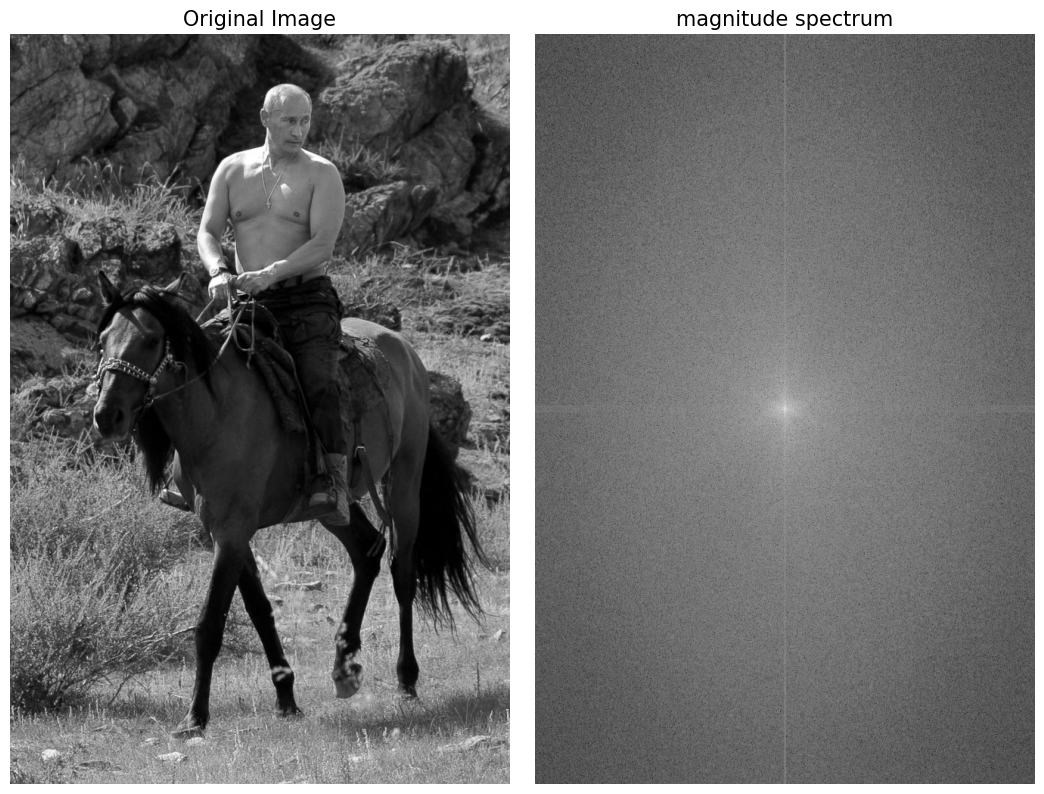

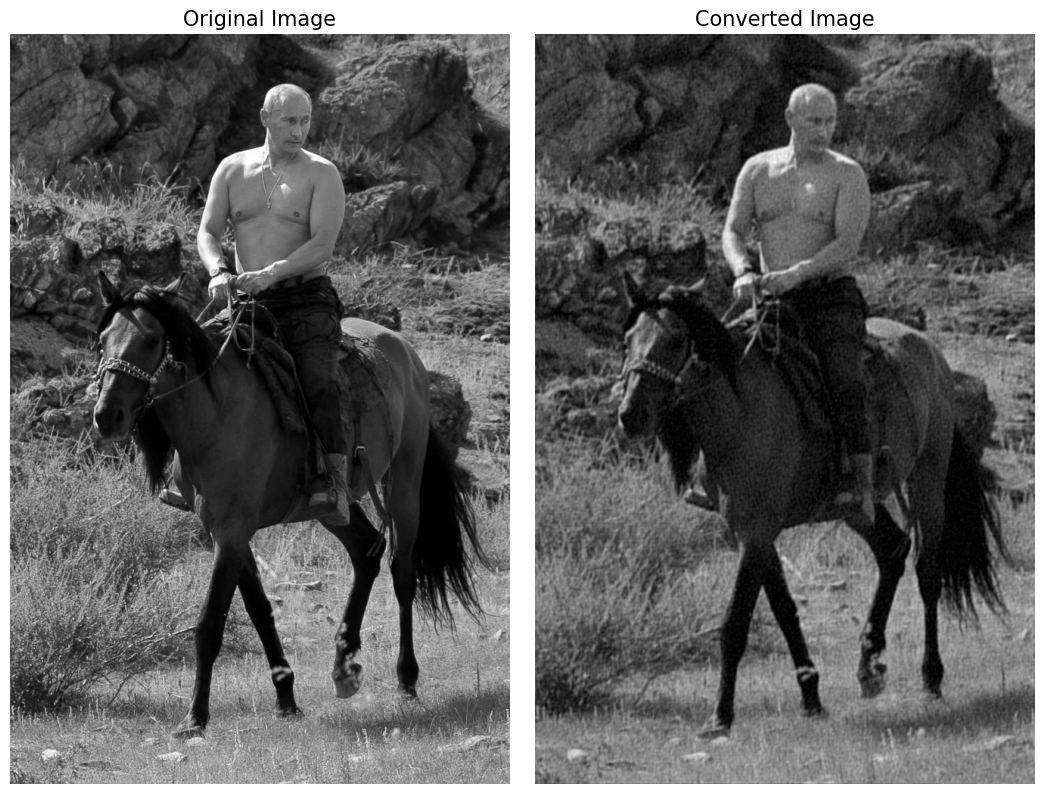

In [42]:
img, img_fft, mag_spec, img_recon, img_, discarded_ratio = fft(image_path, threshold)
print(img_fft.size)

psnr = PSNR(img, img_)
print(psnr)

display(img, mag_spec, 'Original Image', "magnitude spectrum")
display(img, img_, 'Original Image', "Converted Image")

In [43]:
threshold = 0
psnr_list = [] # Create an empty list to store psnr values for each threshold
discarded_list = []  # Create an empty list to store the percentage of discarded values for each threshold

# Iterate through threshold values from 0 to 500 by increments of 25
while threshold <= 475:
    img, img_fft, mag_spec, img_recon, img_, discarded = fft(image_path, threshold)
    # display(img, img_, 'Original Image', "Converted Image")
    psnr = PSNR(img, img_)
    psnr_list.append(psnr)  # Append the psnr value to the list
    discarded_list.append(discarded) # Append the percentage of discarded values to the list
    threshold += 25

# Create a table to display threshold, corresponding psnr values, and percentage of discarded values
table = PrettyTable()
table.field_names = ["Threshold", "PSNR", "Discarded %"]
for i, psnr in enumerate(psnr_list):
    table.add_row([(i+1)*25, round(psnr, 3), round(discarded_list[i], 3)])
print(table)

/tmp/ipykernel_3774761/20305426.py:27: RuntimeWarning: invalid value encountered in divide
  img_recon = (img_recon - np.min(img_recon)) / (np.max(img_recon) - np.min(img_recon)) * 255


+-----------+--------+-------------+
| Threshold |  PSNR  | Discarded % |
+-----------+--------+-------------+
|     25    | 50.663 |     0.0     |
|     50    | 50.663 |     0.0     |
|     75    | 50.381 |    0.002    |
|    100    | 50.441 |     0.01    |
|    125    | 50.116 |    0.135    |
|    150    | 50.12  |    1.567    |
|    175    | 44.934 |    14.399   |
|    200    | 23.114 |    52.922   |
|    225    | 12.588 |    88.297   |
|    250    | 10.582 |    98.687   |
|    275    | 9.495  |    99.844   |
|    300    | 7.863  |    99.978   |
|    325    | 7.608  |    99.997   |
|    350    | 7.617  |    100.0    |
|    375    | 7.617  |    100.0    |
|    400    | 7.803  |    100.0    |
|    425    | 7.803  |    100.0    |
|    450    | 7.803  |    100.0    |
|    475    | 7.803  |    100.0    |
|    500    | 7.803  |    100.0    |
+-----------+--------+-------------+


## Compression using Cosine Transform

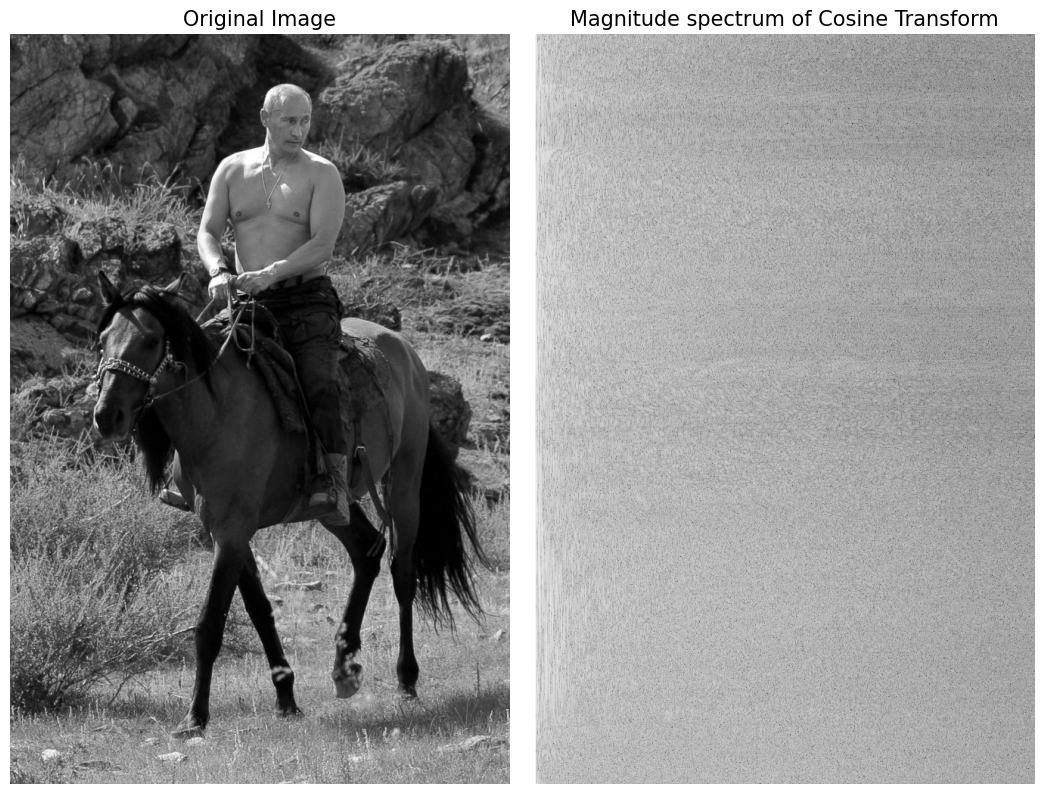

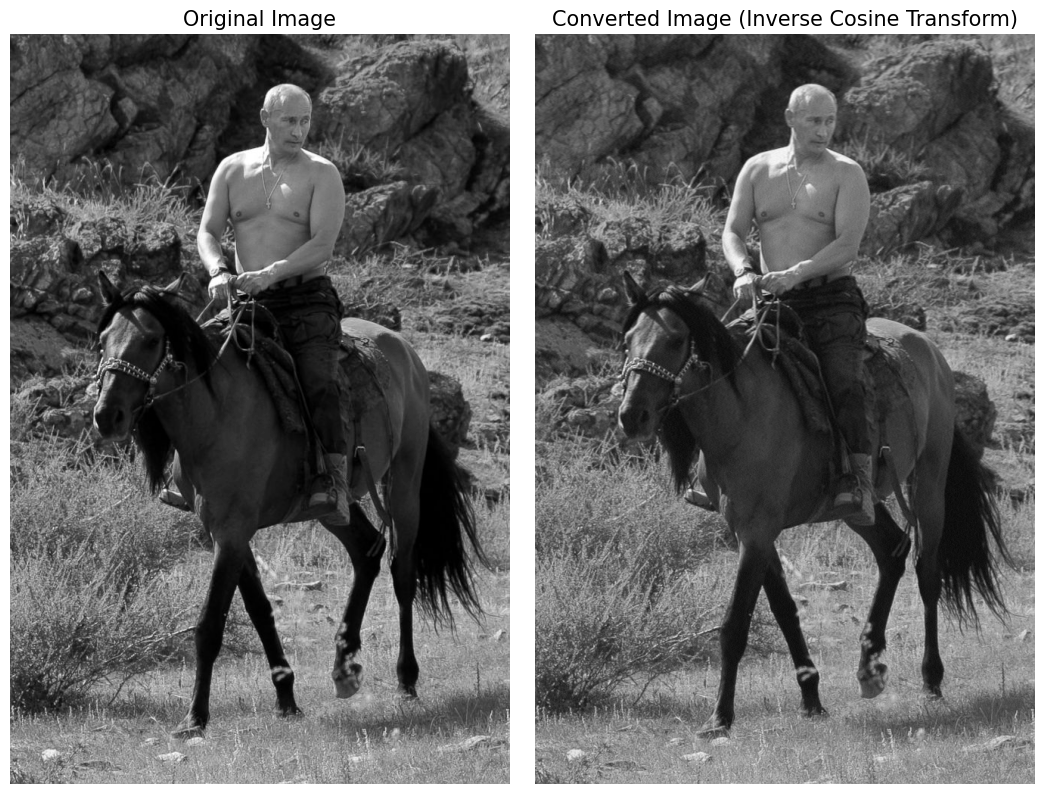

In [44]:
img, img_dct, mag_spec, img_recon, img_, discarded_ratio = cos_transform_built_in(image_path, 50)

psnr = PSNR(img, img_)

display(img, mag_spec, 'Original Image', "Magnitude spectrum of Cosine Transform")
display(img, img_, 'Original Image', "Converted Image (Inverse Cosine Transform)")

In [45]:
threshold = 0
psnr_list = [] # Create an empty list to store psnr values for each threshold
discarded_list = []  # Create an empty list to store the percentage of discarded values for each threshold

# Iterate through threshold values from 0 to 500 by increments of 25
while threshold <= 190:
    img, img_dct, mag_spec, img_recon, img_, discarded_ratio = cos_transform_built_in(image_path, threshold)
    # display(img, img_, 'Original Image', "Converted Image")
    psnr = PSNR(img, img_)
    psnr_list.append(psnr)  # Append the psnr value to the list
    discarded_list.append(discarded_ratio) # Append the percentage of discarded values to the list
    threshold += 10

# Create a table to display threshold, corresponding psnr values, and percentage of discarded values
table = PrettyTable()
table.field_names = ["Threshold", "PSNR", "Discarded %"]
for i, psnr in enumerate(psnr_list):
    table.add_row([(i+1)*10, round(psnr, 3), round(discarded_list[i], 3)])
print(table)

+-----------+--------+-------------+
| Threshold |  PSNR  | Discarded % |
+-----------+--------+-------------+
|     10    | 59.157 |    10.056   |
|     20    | 53.447 |    16.132   |
|     30    | 42.796 |    24.919   |
|     40    | 30.859 |    36.239   |
|     50    | 22.254 |    49.138   |
|     60    | 11.863 |    62.56    |
|     70    | 10.164 |    75.344   |
|     80    | 8.876  |    85.995   |
|     90    | 8.169  |    93.106   |
|    100    | 8.129  |    96.687   |
|    110    | 7.774  |    98.372   |
|    120    | 7.539  |     99.2    |
|    130    |  7.74  |    99.593   |
|    140    | 7.773  |    99.797   |
|    150    | 7.842  |    99.849   |
|    160    | 7.533  |    99.902   |
|    170    | 7.715  |    99.979   |
|    180    | 7.803  |    100.0    |
|    190    | 7.803  |    100.0    |
|    200    | 7.803  |    100.0    |
+-----------+--------+-------------+


/tmp/ipykernel_3774761/1279639192.py:21: RuntimeWarning: invalid value encountered in divide
  img_recon = (img_recon - np.min(img_recon)) / (np.max(img_recon) - np.min(img_recon)) * 255


## Compression using self implemented DCT

**Note:** As in this implementation, there are multiple nested loops, it is very slow. Hence, here, I am using an 8x8 image.

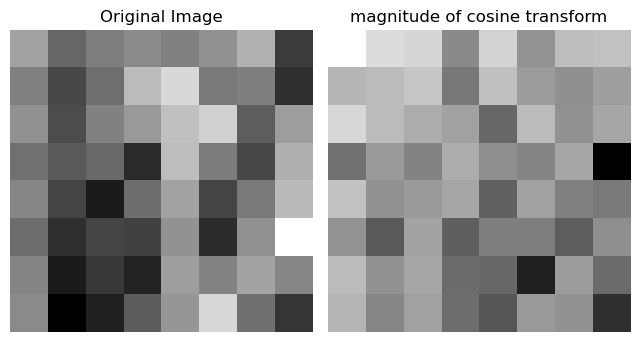

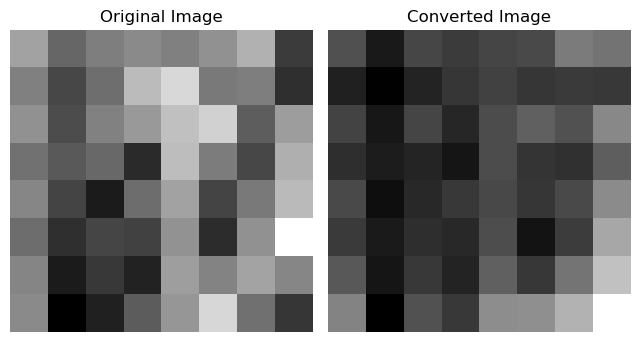

In [46]:
image_path = 'image_2.jpg'
threshold = 20

image, dct, mag_spec,  idct, img_recon, discarded_ratio = cos_transform_self(image_path, threshold)

# Display the original and the resulting image using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(
        image.shape[1], image.shape[0]))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(mag_spec, cmap='gray')
axs[1].set_title('magnitude of cosine transform')
axs[1].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

# Display the original and the resulting image using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(
        image.shape[1], image.shape[0]))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(img_recon, cmap='gray')
axs[1].set_title('Converted Image')
axs[1].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()


In [47]:
threshold = 0
psnr_list = [] # Create an empty list to store psnr values for each threshold
discarded_list = []  # Create an empty list to store the percentage of discarded values for each threshold

# Iterate through threshold values from 0 to 500 by increments of 25
while threshold <= 145:
    image, dct, mag_spec,  idct, img_recon, discarded_ratio = cos_transform_self(image_path, threshold)
    # display(img, img_, 'Original Image', "Converted Image")
    psnr = PSNR(image, img_recon)
    psnr_list.append(psnr)  # Append the psnr value to the list
    discarded_list.append(discarded_ratio) # Append the percentage of discarded values to the list
    threshold += 15

# Create a table to display threshold, corresponding psnr values, and percentage of discarded values
table = PrettyTable()
table.field_names = ["Threshold", "PSNR", "Discarded %"]
for i, psnr in enumerate(psnr_list):
    table.add_row([(i+1)*15, round(psnr, 3), round(discarded_list[i], 3)])
print(table)

+-----------+-------+-------------+
| Threshold |  PSNR | Discarded % |
+-----------+-------+-------------+
|     15    | 7.188 |    1.562    |
|     30    | 6.808 |    3.125    |
|     45    | 7.449 |    4.688    |
|     60    | 7.201 |     12.5    |
|     75    | 8.034 |    29.688   |
|     90    | 6.905 |    60.938   |
|    105    | 8.356 |    84.375   |
|    120    | 6.951 |    96.875   |
|    135    | 7.367 |    98.438   |
|    150    | 7.854 |    100.0    |
+-----------+-------+-------------+


/tmp/ipykernel_3774761/2235546823.py:45: RuntimeWarning: invalid value encountered in divide
  img_recon = (idct - np.min(idct)) / (np.max(idct) - np.min(idct)) * 255
